<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/8.%20Machine%20Learning%20II/Machine_Learning_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 2 Assignment

The data is a marketing campaign data of a skin care clinic associated with its success.

Description of variables-

Success: Response to marketing campaign of Skin Care Clinic which offers both  products and services. (1: email Opened, 0: email not opened)

- AGE: Age Group of Customer

- Recency_Service: Number of days since last service purchase

- Recency_Product: Number of days since last product purchase

- Bill_Service: Total bill amount for service in last 3 months

- Bill_Product: Total bill amount for products in last 3 months

- Gender (1: Male, 2: Female)


Note: Answer following questions using entire data and do not create test data.


QUESTIONS:

1. Import Email Campaign data. Obtain decision tree to classify cases as success=0 or 1. Obtain Sensitivity/Recall using cut-off value as 0.50 for estimated probabilities.
                                                           

2. Compare performance of Decision Tree and Random Forest Method using area under the ROC curve.


3. Implement Neural Network Algorithm and obtain are under the ROC curve .

## Import Libraries


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Classification Report
from sklearn.metrics import classification_report
#Train & Test Split
from sklearn.model_selection import train_test_split
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
#ROC
from sklearn.metrics import roc_curve, roc_auc_score
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#NN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, classification_report

## Import Email Campaign data

In [77]:
data = pd.read_csv('/content/Email Campaign.csv')
data.head()

,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SN               683 non-null    int64  
 1   Gender           683 non-null    int64  
 2   AGE              683 non-null    object 
 3   Recency_Service  683 non-null    int64  
 4   Recency_Product  683 non-null    int64  
 5   Bill_Service     683 non-null    float64
 6   Bill_Product     683 non-null    float64
 7   Success          683 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 42.8+ KB


In [79]:
# Converting data types
data['Gender'] = data['Gender'].astype('category')
data['AGE'] = data['AGE'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SN               683 non-null    int64   
 1   Gender           683 non-null    category
 2   AGE              683 non-null    category
 3   Recency_Service  683 non-null    int64   
 4   Recency_Product  683 non-null    int64   
 5   Bill_Service     683 non-null    float64 
 6   Bill_Product     683 non-null    float64 
 7   Success          683 non-null    int64   
dtypes: category(2), float64(2), int64(4)
memory usage: 33.7 KB


In [80]:
# Define the features and target variable
x_var = ['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Product', 'Gender', 'AGE']

# Convert categorical variables into dummy variables
X = pd.get_dummies(data[x_var], columns=['Gender', 'AGE'], drop_first=True)
X = X.rename( columns = {'AGE_<=45': 'AGE_lqe_45', 'AGE_<=55': 'AGE_lqe_55'} )

y = data['Success']

## Decision Tree

In [81]:

dt = DecisionTreeClassifier(criterion='entropy', min_samples_split= int(len(X)*.10))
dt.fit(X, y)
y_pred_dt = dt.predict(X)
y_prob_dt = dt.predict_proba(X)
print(y_prob_dt)

# Calculate Sensitivity/Recall for Decision Tree
cutoff = 0.5
y_pred_binary_dt = (y_prob_dt[:, 1] >= cutoff).astype(int)
recall_dt = recall_score(y, y_pred_binary_dt)
print(f"Decision Tree Sensitivity/Recall: {recall_dt:.2f}")

# Calculate AUC for Decision Tree
auc_dt = roc_auc_score(y, y_prob_dt[:, 1])
print(f"Decision Tree AUC: {auc_dt:.2f}")

[[0.90697674 0.09302326]
 [0.625      0.375     ]
 [0.8125     0.1875    ]
 ...
 [0.90697674 0.09302326]
 [0.14285714 0.85714286]
 [0.93333333 0.06666667]]
Decision Tree Sensitivity/Recall: 0.44
Decision Tree AUC: 0.87


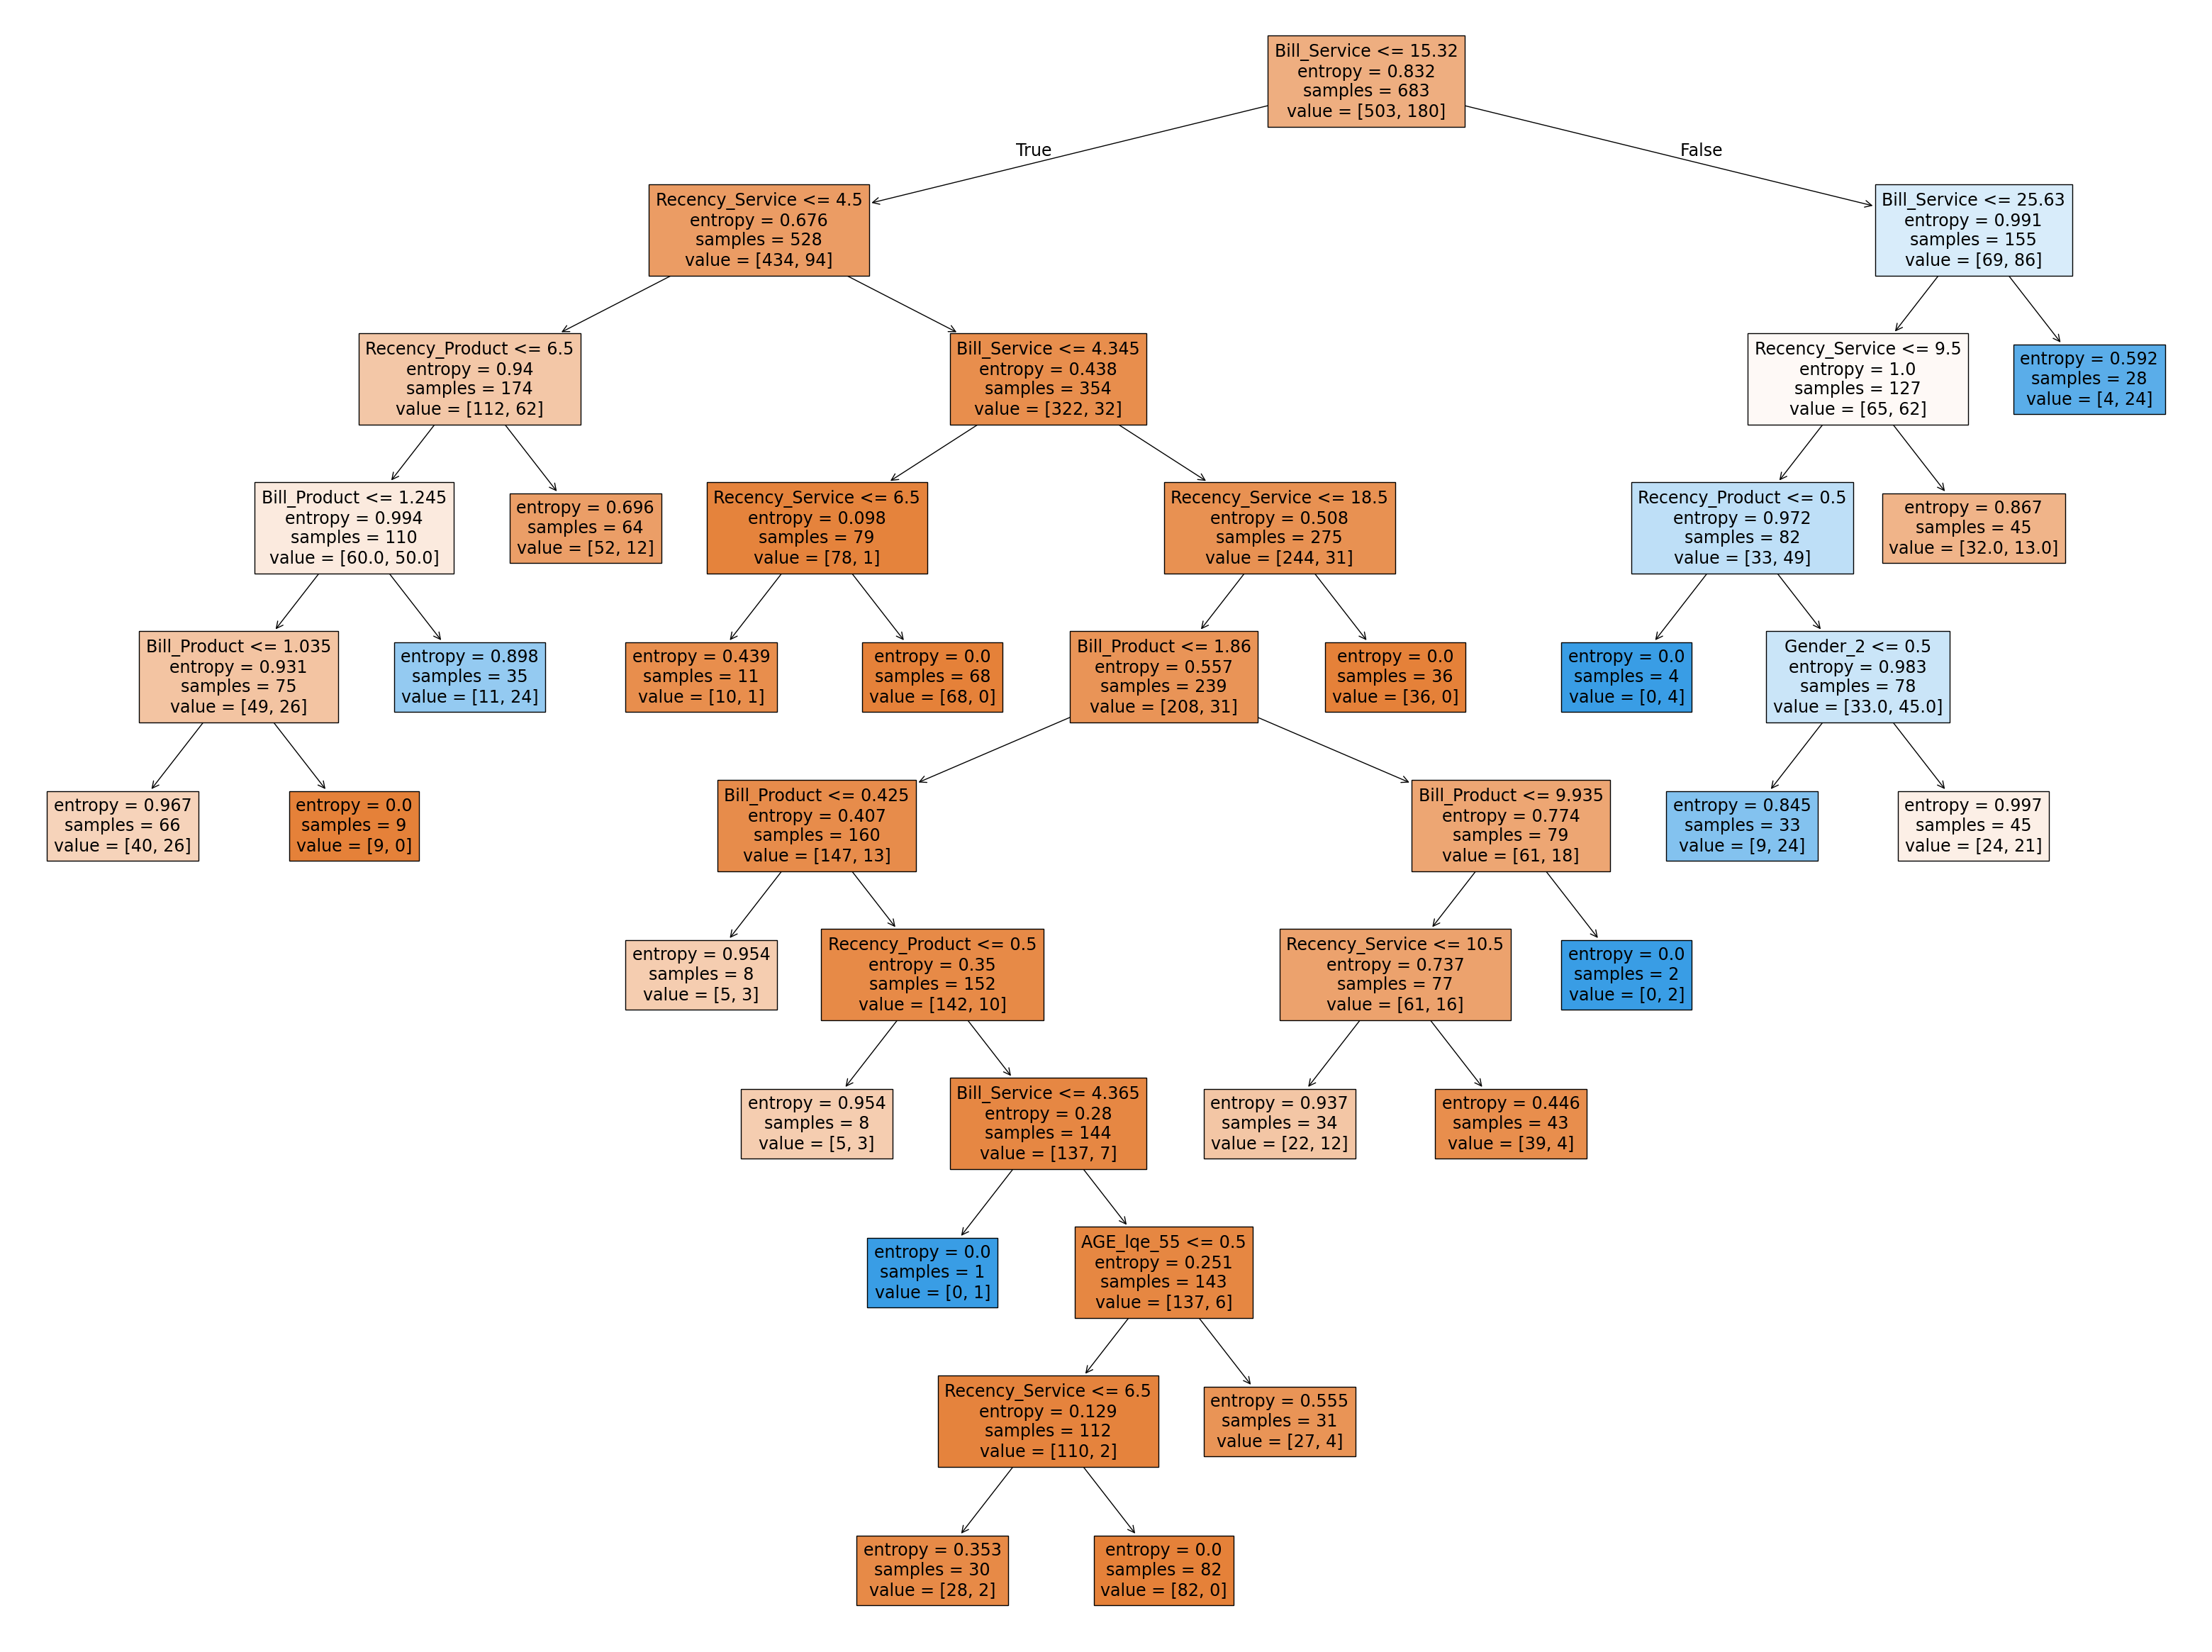

In [82]:
plt.figure(figsize = (40,30))
plot_tree(dt, filled = True, feature_names = list(X.columns))
plt.show()

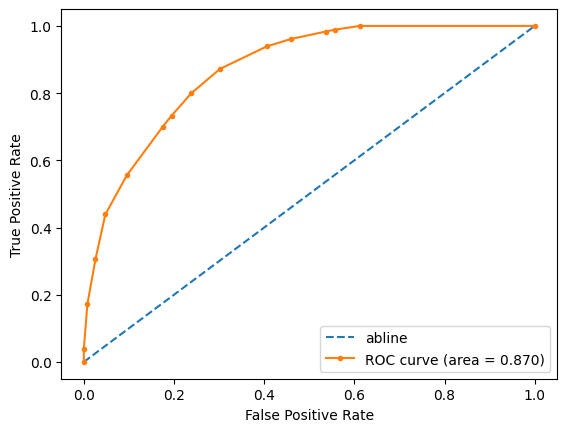

In [83]:
#ROC Curve
DTfpr, DTtpr, thresholds = roc_curve(y, y_prob_dt[:,1])

abline_probs = [0 for _ in range(len(y))]
abline_auc = roc_auc_score(y, abline_probs)
abline_fpr, abline_tpr, _ = roc_curve(y, abline_probs)

plt.plot(abline_fpr, abline_tpr, linestyle='--', label='abline')
plt.plot(DTfpr, DTtpr, marker='.', label='ROC curve (area = %.3f)' % auc_dt)
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.legend();
plt.show()

In [84]:
print(classification_report(y,y_pred_binary_dt))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       503
           1       0.77      0.44      0.56       180

    accuracy                           0.82       683
   macro avg       0.80      0.70      0.72       683
weighted avg       0.81      0.82      0.80       683



## Random Forest

In [85]:
#rf = RandomForestClassifier(random_state=999, n_estimators=100, oob_score=True, max_features='sqrt')

rf = RandomForestClassifier(
    random_state=999,
    n_estimators=50,          # Fewer trees
    oob_score=True,
    max_features=3,           # Fewer features per split
    min_samples_split=10,     # Minimum samples to split
    min_samples_leaf=5,       # Minimum samples at leaf nodes
    max_depth=10              # Limit tree depth
)

rf.fit(X, y)

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, oob_score=True,
                       random_state=999)

In [86]:
rf.oob_score_

0.7906295754026355

In [87]:
#Feature importance
rf.feature_importances_

array([0.25135999, 0.13878048, 0.34618464, 0.21420458, 0.02078497,
       0.01493683, 0.01374851])

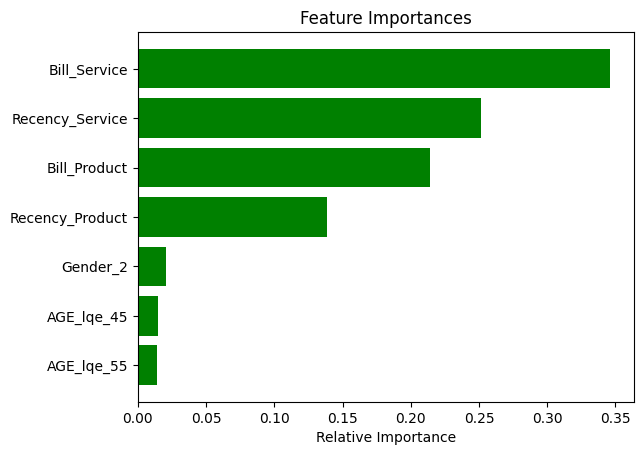

In [88]:
#Importance Matrix
features = list(X.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [89]:
#Calculating Predictions for the model
y_pred = rf.predict(X)
y_prob_rf = rf.predict_proba(X)

pred_test = np.where(y_prob_rf[:,1] > cutoff, 1, 0)
print(classification_report(y,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       503
           1       0.89      0.61      0.72       180

    accuracy                           0.88       683
   macro avg       0.88      0.79      0.82       683
weighted avg       0.88      0.88      0.87       683



In [90]:
#Area Under ROC Curve
auc_rf = roc_auc_score(y, y_prob_rf[:,1])
print('AUC: %.3f' % auc_rf)

AUC: 0.956


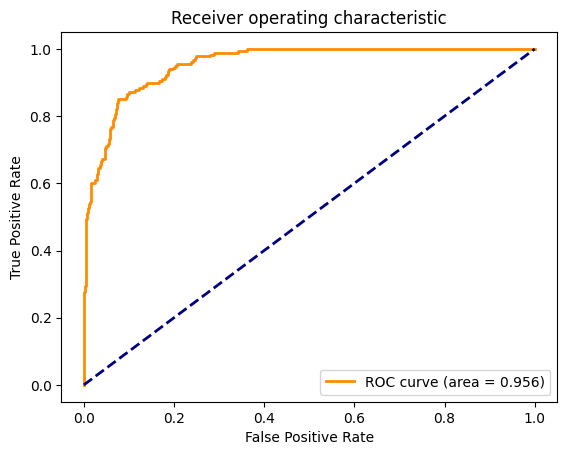

In [91]:
#ROC Curve
RFfpr, RFtpr, thresholds = roc_curve(y, y_prob_rf[:,1])

# plot the roc curve for the model
plt.figure()
lw = 2
plt.plot(RFfpr, RFtpr, color='darkorange',lw=lw, label='ROC curve (area = %.3f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [92]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       503
           1       0.89      0.61      0.72       180

    accuracy                           0.88       683
   macro avg       0.88      0.79      0.82       683
weighted avg       0.88      0.88      0.87       683



## Neural Network

Neural Network AUC: 0.86


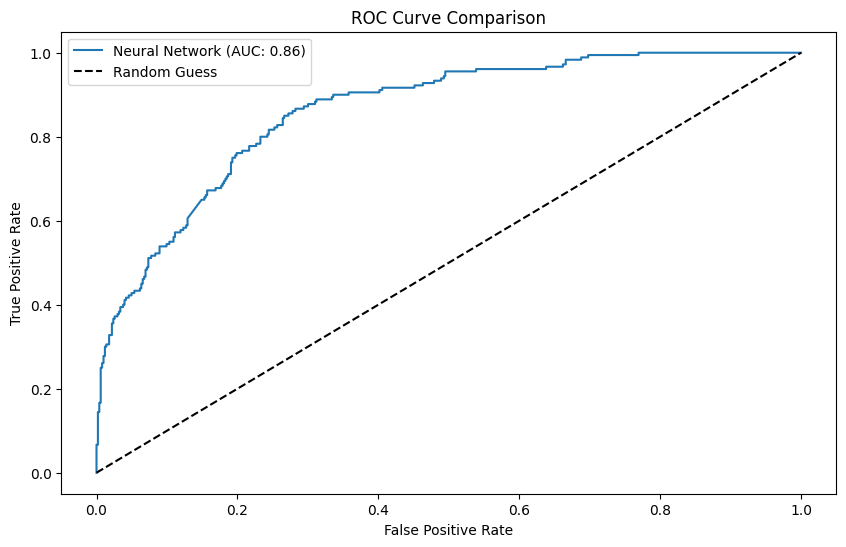

In [93]:
nn = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(10,))
nn.fit(X, y)
y_prob_nn = nn.predict_proba(X)[:, 1]

# Calculate AUC for Neural Network
auc_nn = roc_auc_score(y, y_prob_nn)
print(f"Neural Network AUC: {auc_nn:.2f}")

# Compare ROC Curves
fpr_nn, tpr_nn, _ = roc_curve(y, y_prob_nn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC: {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Conclusion

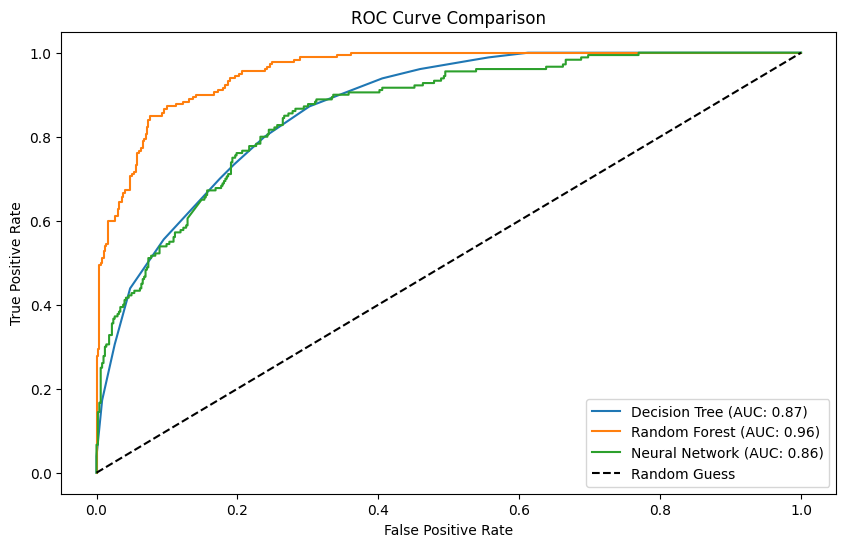

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(DTfpr, DTtpr, label=f"Decision Tree (AUC: {auc_dt:.2f})")
plt.plot(RFfpr, RFtpr, label=f"Random Forest (AUC: {auc_rf:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC: {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Comment: The Random Forest method gives higher AUC for data when compared with Decision Tree and Neural Network